# 16 - Pontos de Interesse e casamento de imagens

Neste roteiro iremos estudar o comportamento de algoritmos de detecção e descrição de pontos de interesse e como usá-los para fazer uma versão simplificada de um algoritmo de busca de imagens. 

## AVISO

Existe uma grande quantidade de tutoriais online com códigos de exemplo para este problema, mas **seu uso não é recomendado**. Além de muitos conterem material claramente desatualizado, muitos tutoriais encorajam um simples copiar-colar de código sem levar em conta as *ideias que o motivaram*. Nesta atividade recomendamos usar, como material complementar, a [documentação do OpenCV em Python](https://docs.opencv.org/3.4.3/d6/d00/tutorial_py_root.html) sobre [Feature Detection and Description](https://docs.opencv.org/3.4.3/db/d27/tutorial_py_table_of_contents_feature2d.html).

## Banco de imagens para a aula

Neste primeiro roteiro iremos trabalhar com um conjunto de imagens que não é focado exclusivamente em recuperação de informação, mas sim em detecção de objetos. Iremos usar a versão de 2005 do [Pascal VOC Challenge](http://host.robots.ox.ac.uk/pascal/VOC/databases.html#VOC2005_1), que você já deve ter baixado. Se não baixou ainda, o download não é pequeno (465Mb) então deixe baixando e prossiga com o roteiro. 


## Pesquisa

1. Detectores de pontos de interesse são classificados, basicamente, em três tipos. Quais são eles e quais características locais das imagens são exploradas?

Os detectores de pontos de interesse são classificados em edge, corner e blob detectors. Eles procuram na imagem, respectivamente, uma borda, uma esquina e uma área diferente (em brilho, cor, algo do tipo).

2. O OpenCV possui diversos algoritmos para detecção e descrição de pontos de interesse. Faça uma lista deles abaixo (deixando bem claro qual método faz detecção, extração ou ambos). Coloque o nome do método, a classe que o implementa e seu tipo (para os detectores somente).

- Harris Corner Detection: Detecção de esquinas e bordas. dst = cv.cornerHarris(imagem_cinza,2,3,0.04)

- Shi-Tomasi Corner Detector & Good Features to Track: Detecção de esquinas. corners = cv.goodFeaturesToTrack(gray,25,0.01,10)

- Introduction to SIFT (Scale-Invariant Feature Transform): Detecção de esquinas quando a imagem tem uma escala diferente. sift = cv.xfeatures2d.SIFT_create(); kp = sift.detect(gray,None); img = cv.drawKeypoints(gray,kp,img)

- Introduction to SURF (Speeded-Up Robust Features): Versão mais rápida do SIFT. surf = cv.xfeatures2d.SURF_create(400); kp, des = surf.detectAndCompute(img,None)

- FAST Algorithm for Corner Detection: Detecção de esquinas para aplicações que precisam de desempenho real time. 

- BRIEF (Binary Robust Independent Elementary Features): SIFT feito consumindo menos memória, coincidência mais rápida e maior precisão. star = cv.xfeatures2d.StarDetector_create() =; brief = cv.xfeatures2d.BriefDescriptorExtractor_create(); kp = star.detect(img,None); kp, des = brief.compute(img, kp)

- ORB (Oriented FAST and Rotated BRIEF): Alternativa para SIFT e SURF de graça. orb = cv.ORB_create(); kp = orb.detect(img,None); kp, des = orb.compute(img, kp)

3. Escolha um dos métodos acima e descreva sua ideia básica no campo abaixo. Você deve indicar em qual artigo ele foi proposto, quais suas características marcantes em relação aos outros métodos e uma aplicação em que este descritor obteve resultados relavantes. 

## Implementação

Vamos agora implementar o método de similaridade de imagens descrito na aula expositiva, resumido abaixo. Você receberá como entrada uma imagem de busca $Q$ e um banco de imagens $\{F^i\}_{i=0}^N$ contendo $N$ imagens.

1. Detecte os pontos de interesse e extraia os descritores $\{q_j\}$ de $Q$
2. Para cada imagem $F^i$:
    - Detecte os pontos de interesse e extraia os descritores $\{F_k\}$ de $F^i$ 
    - Para cada descritor $q_j$, verifique se existe um descritor $F_k$ que casa com ele
    - Calcule a proporção de descritores de $Q$ que casaram com descritores de $F^i$ e use este valor como a similaridade entre as duas imagens.
    
3. Retorne as 5 imagens com maior similaridade;

### Exercício

Antes de continuar, leia com atenção o algoritmo acima e pense: como você organizaria seu código para implementá-lo? Quais funções auxiliares criaria e quais argumentos cada uma receberia? Supondo que todas essas funções auxiliares já foram implementadas, como seria o código principal de seu programa?

In [1]:
#Organização do Código

#Funções auxiliares
def detect_points_of_interest(image)
def match_descriptors(qj, fk)
def calculate_similarity()

#Função Principal
def get_similar_images(query)

SyntaxError: invalid syntax (<ipython-input-1-3f7b4d1d011e>, line 4)

In [ ]:
#Funções auxiliares
def detect_points_of_interest(image)
def match_descriptors(qj, fk)
def calculate_similarity(qj, fk, matches)

#Função Principal
def get_similar_images(query):
    key_images = []
    query_descriptors = detect_points_of_interest(query)
    for image in dir:
        database_descriptors = detect_points_of_interest(image)
        matches = match_descriptors(query_descriptors, database_descriptors)
        calculate_similarity(query_descriptors, database_descriptors, matches)
    return key_images

### Extração e descrição de pontos de interesse

A detecção e descrição de pontos de interesse é um processo que será repetido várias vezes nesta e na próxima atividade. Na parte de pesquisa você identificou alguns métodos de extração e descrição de pontos de interesse. Selecione um de cada tipo (ou um que faça ambos) e crie uma função que recebe uma imagem e retorna os descritores dela. Mesmo que a função seja muito pequena (duas ou três linhas), é uma boa fazê-lo para deixar o programa principal mais legível e parecido com o algoritmo descrito em linguagem natural. 

OBS: os exercícios foram testados usando o descritor *ORB*. Você pode usar outro nos seus testes, mas pode ter que adaptar parte do código. 

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def detect_points_of_interest(image):
    img = cv2.imread(image,0)
    # Initiate STAR detector
    orb = cv2.ORB_create()
    # find the keypoints with ORB
    kp = orb.detect(img,None)
    # compute the descriptors with ORB
    kp, des = orb.compute(img, kp)
    # draw only keypoints location,not size and orientation
    imgout = cv2.drawKeypoints(img,
                               kp,
                               None,
                               color=(0,255,0),
                               flags=0
                              )
    plt.imshow(imgout)
    plt.show()
    return des

Teste sua função usando a imagem *cachorro.jpg*. Você pode visualilzar os pontos de interesse usando a função [`cv2.drawKeypoints()`](https://docs.opencv.org/3.4.3/d4/d5d/group__features2d__draw.html#gab958f8900dd10f14316521c149a60433).

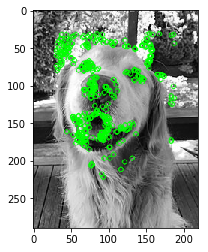

[[172 102 101 ... 141  70 164]
 [ 61  87  96 ... 255  90 253]
 [122  57 154 ...  88  47  10]
 ...
 [ 11 134 108 ...  76 157 243]
 [ 41  11  97 ... 134  80 185]
 [ 66  61 217 ...  64 135 251]]
<class 'numpy.ndarray'>
uint8


In [3]:
# código de teste aqui. 
des = detect_points_of_interest("cachorro.jpg")
print(des)
print(type(des))
print(des.dtype)

### Casamento de pontos de interesse

O OpenCV possui duas técnicas de casamento de pontos de interesse implementadas: `cv2.BFMatcher` e `cv2.FlannBasedMatcher`. Para exercitar a compreensão do algoritmo de casamento vamos implementar nossa própria versão do `BFMatcher`. 

----------

Sim, no projeto vocês podem usar as implementações do OpenCV. Na próxima aula iremos usar o `FlannBasedMatcher` e usar um novo critério para casamento de pontos. 

----------

#### Exercício:

Implemente uma função `reciprocal_math(desc1, desc2)` que faz o casamento dos descritores passados como argumento. Um par de descritores $(d^1_i, d^2_j)$ *casa* se $dist(d^1_i, d^2_j) < dist(d^1_k, d^2_j), k\neq i$ **E** $dist(d^1_i, d^2_j) < dist(d^1_i, d^2_k), k\neq j$. Como função de distância tem duas opções:

1. Se os dados computados pelo seu descritor forem um vetor de float você pode usar a norma $\ell_2$ da diferença dos vetores

$$
dist(d^1_i, d^2_j) = ||d^1_i - d^2_j||_2
$$

2. Se os dados computados forem um vetor de bits você deve usar como distância o número de bits diferentes entre as duas strings. Isto pode ser feito, em Python, em três passos:
    1. Vetores de bits são representados por vetores de inteiros de 8 bits. Para cada um dos inteiros:
    2. Converta-o para uma string contendo sua representação em binário usando a função `format`.
    3. Conte o número de caracteres diferentes nas strings

Para que nossa função `reciprocal_match` seja integrada ao OpenCV precisamos retornar uma lista de objetos do tipo `cv2.DMatch`. Para criar um objeto deste tipo basta chamar o construtor com três parâmetros:

1. índice $i$ do descritor da imagem de pesquisa
2. índice $j$ do descritor da imagem do banco
3. distância calculada como a fórmula acima

In [4]:
# implementar função reciprocal_match aqui
def dist_float(desc1, desc2):
    matches = []
    k = 0
    for i in range(len(desc1)):
        k =+ 1
        for j in range(len(desc2)):
            disti1j2 = ((desc1[i]**2) + (desc2[j]**2)) ** 0.5
            distk1j2 = ((desc1[k]**2) + (desc2[j]**2)) ** 0.5
            disti1k2 = ((desc1[i]**2) + (desc2[k]**2)) ** 0.5
            if (disti1j2 < distk1j2 and disti1j2 < disti1k2):
                matches.append(cv2.DMatch(i,j,disti1j2))
    return matches

def dist_vector(desc1, desc2):
    matches = []
    dist = 0
    for i in range(len(desc1)):
        for j in range(len(desc2)):
            string1 = "{}".format(desc1[i])
            string2 = "{}".format(desc2[j])
            if (len(string1) > len(string2)):
                size = len(string1)
            else:
                size = len(string2)
            for k in range(size):
                if (string1[k] != string2[k]):
                    dist += 1
            matches.append(cv2.DMatch(i,j,dist))
            dist = 0
    return matches

def reciprocal_match(desc1, desc2):
    if (desc1.dtype == np.uint8 and desc2.dtype == np.uint8):
        matches = dist_vector(desc1, desc2)
    else:
        matches = dist_float(desc1, desc2)
    return matches

Vamos analisar os resultados dessa função de casamento usando as imagens *cachorro2.png* e *cidade.jpeg*. Extraia os descritores de ambas e faça um casamento com os descritores extraídos no exercício anterior. Para mostrar os resultados você pode usar a função [`cv2.DrawMatches()`](https://docs.opencv.org/3.4.3/d4/d5d/group__features2d__draw.html#ga7421b3941617d7267e3f2311582f49e1). Mostre também a distância média dos casamentos encontrados. Para comparar, mostre a distância média dos 100 casamentos com menor distância para cada imagem.

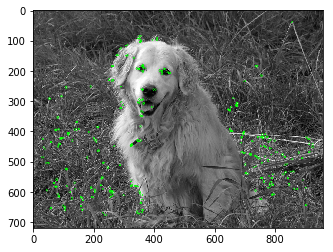

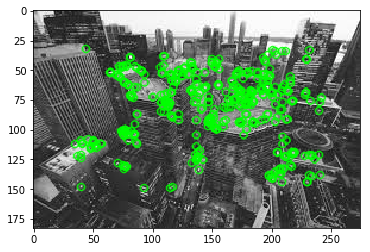

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
# cachorro2.png
desc1 = detect_points_of_interest("cachorro2.jpg")
desc2 = detect_points_of_interest("cidade.jpeg")
matches = reciprocal_match(desc1, desc2)
print(matches)

Em ambos os casos houveram muitos casamentos, mas a distância média foi (deveria ser) menor no caso do cachorro. Modifique a função `reciprocal_match` para receber um terceiro argumento que representa a distância máxima entre descritores para que o casamento seja válido. Determine, então, um valor que torne o número de descritores encontrados nas imagens acima significativamente diferente. 

In [ ]:
# seu código aqui

Teste o valor determinado com a imagem *cachorro3.jpg*. Comente os resultados obtidos.

In [ ]:
# cachorro3.jpg

### Juntando tudo

Use as funções acima para calcular a similaridade entre duas imagens, definida como a proporção de pontos casados em relação ao número de pontos da imagem de pesquisa $Q$. Sua função deve se chamar `similarity_proportion_matches` e deve receber duas imagens como entrada e retornar um número entre $0$ (totalmente diferente) e $1$ (idênticas). 

In [ ]:
# seu código aqui

Rode sua função com as imagens usadas no exercício anterior e verifique se sua função de similaridade ordenaria as imagens de maneira satisfatória.

In [ ]:
# um teste da função similaridade

### Testes e avaliação crítica dos resultados

Você deve agora executar seu código nas imagens da base de dados sugerida no começo do roteiro. São presentes apenas imagens com 4 objetos diferentes: pessoas, motos, bicicletas e carros. Selecione uma imagem de cada tipo e mostre as 3 imagens com maior similaridade para cada uma delas.

In [ ]:
# busca 1

In [ ]:
# busca 2

In [ ]:
# busca 3

In [ ]:
# busca 4

*Meus comentários sobre os resultados aqui*

Faça agora uma busca usando uma imagem focada em um outro objeto qualquer e mostre as 3 imagens mais similares abaixo. 

*Meus comentários sobre os resultados aqui*

### Análise crítica e Revisão de conceitos

Descreva com suas próprias palavras o quê são pontos de interesse e descritores.  

*sua resposta aqui*

Construimos uma abordagem que ordenou as três imagens testadas. Comente uma desvantagem desta abordagem. 

*sua resposta*